# The objective of this Notebook is to use Starbucks data to turn infrequent customers into regulars. In particular I create multiple models which try and predict whether or not a user will use a particular offer or not. 
The steps I take are :
1- Data exploration
2- Data preprocessing and wrangling 
3- Data division based on frequency of customers
4- Model creation and testing

In [1]:
import datetime
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import json
#% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

#  Data Exploration of different datasets
- Here I check for any Nan values. Fortunately all the data was perfect.

In [2]:
# explore the portfolio

print(portfolio.isnull().sum().sum()) # counts the number of Nan coloumns


print(len(portfolio['id'].unique()))

portfolio.head(20)

0
10


,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


# Here I am listing out the rows in the profile data set with Nan values and dropping Nan values. 
#### - In the profile dataset I am not lucky again as there are 4350 data rows with Nan values.
#### - Due to the relative small amount of nan rows I made the decision to elimanate those rows.


In [3]:
# explore the portfolio
print(profile.isnull().sum().sum()) # counts the number of Nan coloumns
print(len(profile['age']))
profile.head()

is_NaN = profile.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = profile[row_has_NaN]

print(rows_with_NaN.head(10))

print(len(rows_with_NaN['id'].unique()))

4350
17000
   gender  age                                id  became_member_on  income
0    None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212     NaN
2    None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712     NaN
4    None  118  a03223e636434f42ac4c3df47e8bac43          20170804     NaN
6    None  118  8ec6ce2a7e7949b1bf142def7d0e0586          20170925     NaN
7    None  118  68617ca6246f4fbc85e91a2a49552598          20171002     NaN
9    None  118  8974fc5686fe429db53ddde067b88302          20161122     NaN
10   None  118  c4863c7985cf408faee930f111475da3          20170824     NaN
11   None  118  148adfcaa27d485b82f323aaaad036bd          20150919     NaN
17   None  118  744d603ef08c4f33af5a61c8c7628d1c          20170801     NaN
23   None  118  2b826eba31074a059d63b0ae8f50b7d5          20170907     NaN
2175


In [4]:
print("length before dropping " + str(len(profile['age'])))

profile= profile.dropna()
print("length before dropping " + str(len(profile['age'])))
profile.head()# here we eliminated unwated rows




length before dropping 17000
length before dropping 14825


,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


In [5]:
print("Number of Nan rows now = " + str(transcript.isnull().sum().sum())) # counts the number of Nan coloumns

transcript.head()

Number of Nan rows now = 0


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


# This is the Transcript dataframe

In [6]:
sorted_trans=transcript.sort_values(by=['person'])
sorted_trans.head(30)

,person,event,value,time
302205,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 18.41},696
168412,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 8.57},414
300930,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 28.16},690
55972,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168
153401,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},408
233413,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},540
228422,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 14.11},528
228423,0009655768c64bdeb2e877511632db8f,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,528
77705,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},192
293497,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 12.36},660


## Here we are processing the data to create more attributes.
##### -In particular I created a list of id's and the most viewed and completed ID for each customer. Furthermore I added more attributed from the portofolio to the transcript dataset: such as number of bogo, number of complted , total spent at starbucks etc..

In [7]:
tester=sorted_trans['value'][187554]
result= json.dumps(tester)     
print(      result.split(":")[1].split("}")[0]      )
print(sorted_trans['value'][228423])


# AdDing final output for neural net

#Quantifying the information and recording new attributes
#first = 0009655768c64bdeb2e877511632db8f


first_id=   [''] * len(sorted_trans.person.unique())
first_completed =   [0] * len(sorted_trans.person.unique())# 1 for completed for 0 for not


temp='0009655768c64bdeb2e877511632db8f'
count=0
bypass=True

for i in sorted_trans.index:
            if sorted_trans['event'][i]=='offer viewed' and bypass== True:                 
                 first_id[count]=(json.dumps(sorted_trans['value'][i]).split(":")[1].split("}")[0])
                 bypass=False
                
            if sorted_trans['event'][i]=='offer completed' and (json.dumps(sorted_trans['value'][i])).split(",")[0].split(":")[1]==first_id[count]:
                first_completed[count]=1
                
                

            if sorted_trans['person'][i]!=temp:
                count+=1
                temp=sorted_trans['person'][i]
                bypass=True
            
       

 "f19421c1d4aa40978ebb69ca19b0e20d"
{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}


In [8]:
#Quantifying the information and recording new attributes
#first = 0009655768c64bdeb2e877511632db8f

b1=' "ae264e3637204a6fb9bb56bc8210ddfd"'
b2=' "4d5c57ea9a6940dd891ad53e9dbe8da0"'
b3=' "9b98b8c7a33c4b65b9aebfe6a799e6d9"'
b4=' "f19421c1d4aa40978ebb69ca19b0e20d"'
i1=' "3f207df678b143eea3cee63160fa8bed"'
i2=' "5a8bc65990b245e5a138643cd4eb9837"'
d1=' "0b1e1539f2cc45b7b9fa7c272da2e1d7"'
d2=' "2298d6c36e964ae4a3e7e9706d1fb8c2"'
d3=' "fafdcd668e3743c1bb461111dcafc2a4"'
d4=' "2906b810c7d4411798c6938adc9daaa5"'

viewandcomp=   [0] * len(sorted_trans.person.unique())
viewandnot =   [0] * len(sorted_trans.person.unique())
bogo_count =   [0] * len(sorted_trans.person.unique())
i_count    =   [0] * len(sorted_trans.person.unique())
dis_count  =   [0] * len(sorted_trans.person.unique())

diff=  [0] * len(sorted_trans.person.unique())
reward=[0] * len(sorted_trans.person.unique())
type=  [0] * len(sorted_trans.person.unique())


viewed_arr=[]
temp='0009655768c64bdeb2e877511632db8f'
count=0
for i in sorted_trans.index:
            if sorted_trans['event'][i]=='offer viewed':                 
                 viewed_arr.append(json.dumps(sorted_trans['value'][i]).split(":")[1].split("}")[0])
                
            if sorted_trans['event'][i]=='offer completed':
                
                act_val=(json.dumps(sorted_trans['value'][i])).split(",")[0].split(":")[1]
                if act_val==d1:
                    type[count]=3
                    dis_count[count]+=1
                    diff[count]=20
                    reward[count]=5
                elif act_val == d2:
                    type[count]=3
                    dis_count[count]+=1
                    diff[count]=7
                    reward[count]=3
                elif act_val == d3:
                    type[count]=3
                    dis_count[count]+=1
                    diff[count]=10
                    reward[count]=2
                elif act_val == d4:
                    type[count]=3
                    dis_count[count]+=1
                    diff[count]=10
                    reward[count]=2
                elif act_val == b1:
                    type[count]=1
                    bogo_count[count]+=1
                    diff[count]=10
                    reward[count]=10
                elif act_val == b2:
                    type[count]=1
                    bogo_count[count]+=1
                    diff[count]=10
                    reward[count]=10
                elif act_val == b3:
                    type[count]=1
                    bogo_count[count]+=1
                    diff[count]=5
                    reward[count]=5
                elif act_val == b4:
                    type[count]=1
                    bogo_count[count]+=1
                    diff[count]=5
                    reward[count]=5
                elif act_val == i1:
                    i_count[count]+=1
                    type[count]=2
                    diff[count]=0
                    reward[count]=0
                elif act_val == i2:
                    i_count[count]+=1
                    type[count]=2
                    diff[count]=0
                    reward[count]=0
                
                
                if act_val in viewed_arr:
                    viewandcomp[count]+=1
                    viewed_arr.remove((json.dumps(sorted_trans['value'][i])).split(",")[0].split(":")[1])
                    

            if sorted_trans['person'][i]!=temp:
                for x in range(len(viewed_arr)): 
                        viewandnot[count]+=1

                viewed_arr=[]
                count+=1
                temp=sorted_trans['person'][i]
            
       
                    
print(len(viewed_arr))
print(len(viewandcomp))
           

1
17000


### Here I am adding the newly created lists as a new coloumn in my created Dataframe

In [9]:
#NOW we are getting total bogo discount or whatever
# I am chosing to forget the little differences in the type of discounts and chosing 3 MAIN TYPES BOGO, INTER, DISCOUNT

new_df=pd.DataFrame()

new_df['ViewAndComp'] = pd.Series(viewandcomp)

new_df['ViewAndNot']= pd.Series(viewandnot)

new_df['BogoCount']= pd.Series(bogo_count)

new_df['ICount']= pd.Series(i_count)

new_df['DisCount']= pd.Series(dis_count)

new_df['Difficulty']= pd.Series(diff)

new_df['Reward']= pd.Series(reward)

new_df['Type']= pd.Series(type)



new_df.head(100)
           

,ViewAndComp,ViewAndNot,BogoCount,ICount,DisCount,Difficulty,Reward,Type
0,1,4,1,0,2,10,2,3
1,0,1,0,0,1,7,3,3
2,0,5,2,0,1,10,10,1
3,1,2,1,0,2,5,5,1
4,0,4,1,0,1,5,5,1
...,...,...,...,...,...,...,...,...
95,1,2,0,0,1,20,5,3
96,0,4,3,0,1,20,5,3
97,1,2,1,0,2,10,2,3
98,0,2,1,0,0,5,5,1


In [10]:
new_profile=profile.dropna()
len(new_profile)
new_profile.head(10)

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
13,F,61,aa4862eba776480b8bb9c68455b8c2e1,20170911,57000.0
14,M,26,e12aeaf2d47d42479ea1c4ac3d8286c6,20140213,46000.0
15,F,62,31dda685af34476cad5bc968bdb01c53,20160211,71000.0
16,M,49,62cf5e10845442329191fc246e7bcea3,20141113,52000.0
18,M,57,6445de3b47274c759400cd68131d91b4,20171231,42000.0


In [11]:
#method to get value form colounmn
a = sorted_trans['person'].unique()


In [12]:
#Trying to create an df that has person, total amount of money spent and total amount of transactions 
#first = 0009655768c64bdeb2e877511632db8f
amount=0
event_amt=    [0] * len(sorted_trans.person.unique())
event_coloumn=[0] * len(sorted_trans.person.unique())

temp='0009655768c64bdeb2e877511632db8f'
count=0
for i in sorted_trans.index:
            if sorted_trans['event'][i]=='transaction':
                 event_coloumn[count]=event_coloumn[count]+1
                 result= json.dumps(sorted_trans['value'][i])     
                 event_amt[count]=float(result.split(":")[1].split("}")[0])+event_amt[count]
                 
            if sorted_trans['person'][i]!=temp:
                count+=1
                temp=sorted_trans['person'][i]

           
        


## Here is the dataframe while in the middle of adding all new coloumns of attributes

In [13]:
#new_df=pd.DataFrame()

new_df['TotalTransactions'] = pd.Series(event_coloumn)

new_df['TotalSpent']= pd.Series(event_amt)

new_df['UserID']= pd.Series(a)

new_df['TestId']= pd.Series(first_id)

new_df['Yes/No']=pd.Series(first_completed)

new_df.head(10)

,ViewAndComp,ViewAndNot,BogoCount,ICount,DisCount,Difficulty,Reward,Type,TotalTransactions,TotalSpent,UserID,TestId,Yes/No
0,1,4,1,0,2,10,2,3,8,127.60,0009655768c64bdeb2e877511632db8f,"""fafdcd668e3743c1bb461111dcafc2a4""",1
1,0,1,0,0,1,7,3,3,3,4.09,00116118485d4dfda04fdbaba9a87b5c,"""f19421c1d4aa40978ebb69ca19b0e20d""",0
2,0,5,2,0,1,10,10,1,5,79.46,0011e0d4e6b944f998e987f904e8c1e5,"""2298d6c36e964ae4a3e7e9706d1fb8c2""",0
3,1,2,1,0,2,5,5,1,8,196.86,0020c2b971eb4e9188eac86d93036a77,"""fafdcd668e3743c1bb461111dcafc2a4""",1
4,0,4,1,0,1,5,5,1,13,159.06,0020ccbbb6d84e358d3414a3ff76cffd,"""f19421c1d4aa40978ebb69ca19b0e20d""",0
5,1,3,0,0,3,10,2,3,17,43.33,003d66b6608740288d6cc97a6903f4f0,"""5a8bc65990b245e5a138643cd4eb9837""",0
6,0,2,0,0,1,10,2,3,17,68.51,00426fe3ffde4c6b9cb9ad6d077a13ea,"""fafdcd668e3743c1bb461111dcafc2a4""",0
7,2,0,1,0,1,5,5,1,7,173.50,004b041fbfe44859945daa2c7f79ee64,"""fafdcd668e3743c1bb461111dcafc2a4""",1
8,1,3,3,0,2,10,2,3,12,321.27,004c5799adbf42868b9cff0396190900,"""fafdcd668e3743c1bb461111dcafc2a4""",1
9,0,4,1,0,0,5,5,1,3,11.33,005500a7188546ff8a767329a2f7c76a,"""ae264e3637204a6fb9bb56bc8210ddfd""",0


# Here I have illustrated a few graphs to show how wealth, age and Total Transactions are distributed. Below is also the main dataframe from which I train my model.
#### - I am mainly intrested in the distrobution of people to differentiate the infrequent customers from the regular ones.

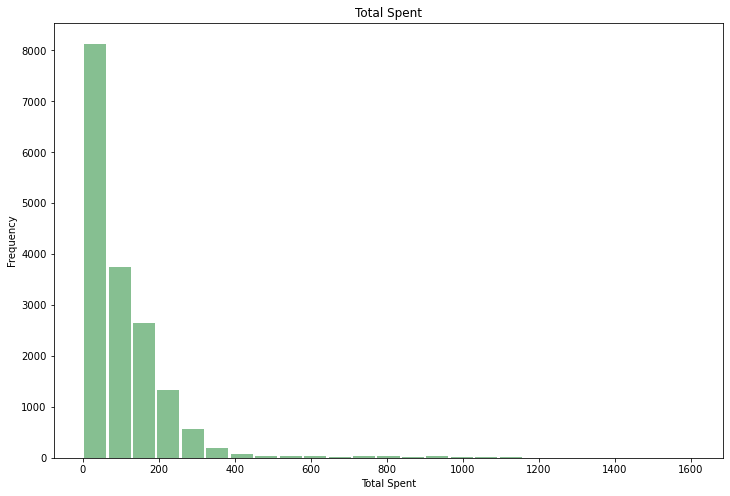

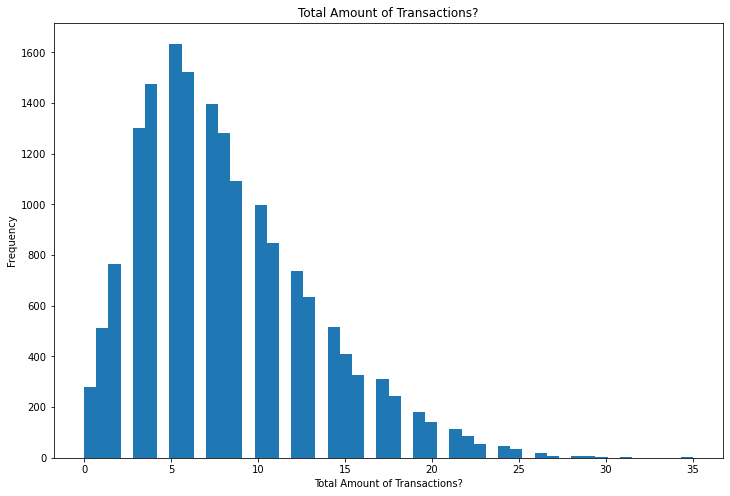

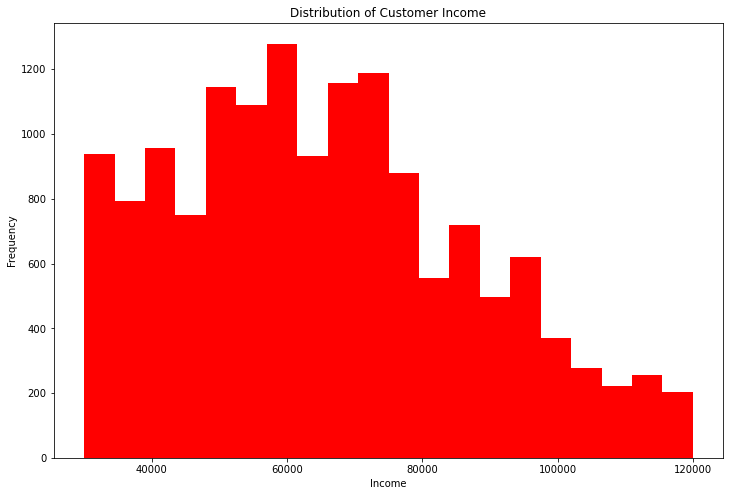

In [14]:
def display_customer_profile():
    '''Display customer profile with histograms'''
    
    # Display Histogram of Customer Age
    user_age = new_df['TotalSpent'].plot(kind='hist',  title='Total Spent',bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
    user_age.set_xlabel("Total Spent")
       
    # Display Histogram of the days being member
    plt.figure()
    memberdays = new_df['TotalTransactions'].plot(kind='hist', bins=50,figsize=(12,8), title='Total Amount of Transactions?')
    memberdays.set_xlabel("Total Amount of Transactions?")
    
    # Display Histogram of User Income
    plt.figure()
    user_income = profile['income'].plot(kind='hist', bins=20, figsize=(12,8),color='r',title='Distribution of Customer Income')
    user_income.set_xlabel("Income")

display_customer_profile()


In [15]:
#ELiminate unwanted rows
print(len(new_df))
new_profile=new_profile.rename(columns={"id": "UserID"})

print(new_profile.head())

new_df2=pd.merge(new_df, new_profile, on="UserID")


print(len(new_df2))
new_df2.head(10)


17000
   gender  age                            UserID  became_member_on    income
1       F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
3       F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
5       M   68  e2127556f4f64592b11af22de27a7932          20180426   70000.0
8       M   65  389bc3fa690240e798340f5a15918d5c          20180209   53000.0
12      M   58  2eeac8d8feae4a8cad5a6af0499a211d          20171111   51000.0
14825


,ViewAndComp,ViewAndNot,BogoCount,ICount,DisCount,Difficulty,Reward,Type,TotalTransactions,TotalSpent,UserID,TestId,Yes/No,gender,age,became_member_on,income
0,1,4,1,0,2,10,2,3,8,127.60,0009655768c64bdeb2e877511632db8f,"""fafdcd668e3743c1bb461111dcafc2a4""",1,M,33,20170421,72000.0
1,0,5,2,0,1,10,10,1,5,79.46,0011e0d4e6b944f998e987f904e8c1e5,"""2298d6c36e964ae4a3e7e9706d1fb8c2""",0,O,40,20180109,57000.0
2,1,2,1,0,2,5,5,1,8,196.86,0020c2b971eb4e9188eac86d93036a77,"""fafdcd668e3743c1bb461111dcafc2a4""",1,F,59,20160304,90000.0
3,0,4,1,0,1,5,5,1,13,159.06,0020ccbbb6d84e358d3414a3ff76cffd,"""f19421c1d4aa40978ebb69ca19b0e20d""",0,F,24,20161111,60000.0
4,1,3,0,0,3,10,2,3,17,43.33,003d66b6608740288d6cc97a6903f4f0,"""5a8bc65990b245e5a138643cd4eb9837""",0,F,26,20170621,73000.0
5,0,2,0,0,1,10,2,3,17,68.51,00426fe3ffde4c6b9cb9ad6d077a13ea,"""fafdcd668e3743c1bb461111dcafc2a4""",0,F,19,20160809,65000.0
6,2,0,1,0,1,5,5,1,7,173.50,004b041fbfe44859945daa2c7f79ee64,"""fafdcd668e3743c1bb461111dcafc2a4""",1,F,55,20180508,74000.0
7,1,3,3,0,2,10,2,3,12,321.27,004c5799adbf42868b9cff0396190900,"""fafdcd668e3743c1bb461111dcafc2a4""",1,M,54,20160331,99000.0
8,0,4,1,0,0,5,5,1,3,11.33,005500a7188546ff8a767329a2f7c76a,"""ae264e3637204a6fb9bb56bc8210ddfd""",0,M,56,20171209,47000.0
9,0,2,1,0,2,20,5,3,5,144.14,0056df74b63b4298809f0b375a304cf4,"""9b98b8c7a33c4b65b9aebfe6a799e6d9""",0,M,54,20160821,91000.0


Text(0.5, 0, 'age')

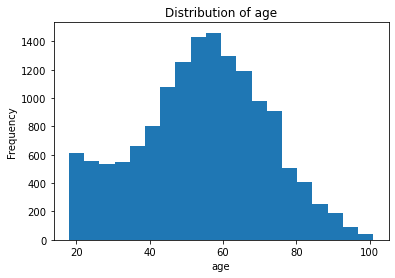

In [16]:
#print(new_df2.sort_values(by=['age'],ascending=False).head(1550))

plt.figure()
user_income = new_df2['age'].plot(kind='hist', bins=20, title='Distribution of age')
user_income.set_xlabel("age")

# I decided to divide the data at the total number of transactions done at 25 and total spent at Starbucks  375 dollars.
### - This is because approximately 84% of the users have transactions greator than 25 and have spent more than 375 dollars at starbucks. 

In [17]:
#new Cut off Dataframe
from sklearn.preprocessing import MinMaxScaler

#Possible locations of cutoff
print("Length of dataset with People less than 25 transactions "+str((new_df2['TotalTransactions']<25).sum()))
print("Length of dataset with People less than 375 transactions "+str((new_df2['TotalSpent']<375).sum()))


df = new_df2[new_df2['TotalTransactions']<25] 


#print(df.head(5))
df=df.drop(['UserID', 'TestId'],axis=1)




for x in df.index:
    if df['gender'][x]=='M':
        df['gender'][x]=1
    elif df['gender'][x]=='F':
        df['gender'][x]=2
    else:
        df['gender'][x]=3
        a

diff=  [0] * len(sorted_trans.person.unique())
reward=[0] * len(sorted_trans.person.unique())
type=  [0] * len(sorted_trans.person.unique())

   
scaler = MinMaxScaler()

df[df.columns.difference(['Yes/No'])] = scaler.fit_transform(df[df.columns.difference(['Yes/No'])])

df=df.sample(frac = 1) 

print(df.head(10))
print(len(df))



Length of dataset with People less than 25 transactions 14741
Length of dataset with People less than 375 transactions 14428


/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

      ViewAndComp  ViewAndNot  BogoCount  ICount  DisCount  Difficulty  \
6180     0.333333    0.142857   0.166667     0.0  0.333333        0.50   
8294     0.166667    0.714286   0.166667     0.0  0.166667        0.25   
3837     0.000000    0.142857   0.000000     0.0  0.333333        0.50   
8385     0.166667    0.428571   0.166667     0.0  0.166667        0.50   
9646     0.666667    0.285714   0.166667     0.0  0.500000        0.50   
618      0.333333    0.428571   0.666667     0.0  0.166667        0.50   
6501     0.166667    0.285714   0.000000     0.0  0.333333        0.50   
5075     0.166667    0.714286   0.166667     0.0  0.166667        0.50   
1667     0.333333    0.142857   0.166667     0.0  0.333333        0.25   
6382     0.000000    0.285714   0.000000     0.0  0.000000        0.00   

      Reward      Type  TotalTransactions  TotalSpent  Yes/No  gender  \
6180     0.2  1.000000           0.500000    0.109922       1     0.5   
8294     0.5  0.333333           0.2083

# Now that DataPreprocessign and Wrangling is done , Data splitting is Due
- Here I split the data into a 70 -30 split for training  and testing.

In [18]:
import sklearn.model_selection as model_selection
#import sklearn.cross_validation as cross_validation1
from sklearn.model_selection import train_test_split

y=df['Yes/No']
#X=test_df.loc[:, test_df.columns != ['Yes/No','gender']]
X = df[df.columns.difference(['Yes/No'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=101)

In [19]:
print ("X_train: ", X_train[0:10])
print ("y_train: ", y_train[0:10])
print("X_test: ", X_test[0:10])
print ("y_test: ", y_test[0:10])

X_train:         BogoCount  Difficulty  DisCount  ICount  Reward  TotalSpent  \
7390    0.333333        0.50  0.666667     0.0     0.2    0.103774   
6562    0.166667        0.25  0.000000     0.0     0.5    0.018661   
1949    0.000000        0.35  0.166667     0.0     0.3    0.042426   
2871    0.166667        0.50  0.166667     0.0     0.2    0.102928   
11356   0.166667        0.25  0.000000     0.0     0.5    0.022155   
4398    0.000000        0.00  0.000000     0.0     0.0    0.014764   
8203    0.000000        0.00  0.000000     0.0     0.0    0.016964   
6658    0.333333        0.35  0.166667     0.0     0.3    0.176100   
4678    0.333333        0.50  0.166667     0.0     1.0    0.051875   
13039   0.000000        0.00  0.000000     0.0     0.0    0.046100   

       TotalTransactions      Type  ViewAndComp  ViewAndNot       age  \
7390            0.291667  1.000000     0.500000    0.142857  0.385542   
6562            0.291667  0.333333     0.000000    0.428571  0.698795   


# Model selection and training- The main objective is to use the data I have combined to create a model which determined best whether or not a currently infrequent person will use an offer to buy an Item at Starbucks.
#### - First, as a baseline I try a Logistic regression and a RandomForest Resgression 
#### - Second I try a simple MLP classification using Scikitlean's module
#### - Finally I use Keras to create my own Neural Net

In [29]:
print((X_test))
print((y_test))


       BogoCount  Difficulty  DisCount  ICount  Reward  TotalSpent  \
74      0.333333        0.50  0.333333     0.0     0.2    0.088861   
856     0.166667        0.50  0.833333     0.0     0.2    0.261492   
12153   0.166667        0.50  0.166667     0.0     0.2    0.517222   
1985    0.166667        0.50  0.000000     0.0     1.0    0.013241   
4759    0.000000        0.00  0.000000     0.0     0.0    0.040729   
...          ...         ...       ...     ...     ...         ...   
7023    0.000000        0.00  0.000000     0.0     0.0    0.003643   
1307    0.000000        0.35  0.333333     0.0     0.3    0.035756   
5628    0.166667        0.50  0.000000     0.0     1.0    0.041500   
4155    0.000000        0.00  0.000000     0.0     0.0    0.002256   
11977   0.166667        0.25  0.166667     0.0     0.5    0.018257   

       TotalTransactions      Type  ViewAndComp  ViewAndNot       age  \
74              0.500000  1.000000     0.166667    0.285714  0.024096   
856          

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,
from sklearn.utils.multiclass import unique_labels
empty = {}
  
rand = RandomForestClassifier(random_state=101) # RandomForestClassifier

gsc= GridSearchCV(estimator=rand, param_grid=empty, scoring='accuracy', cv=10)
print("Training {} :".format(rand.__class__.__name__))
gsc.fit(X, y)

print(rand.__class__.__name__)
print("Best accuracy Value attained: {}".format(round(grid.best_score_,4)))

grid = GridSearchCV(estimator=rand, param_grid=empty, scoring='f1', cv=10)
print("Training {} :".format(rand.__class__.__name__))
gsc.fit(X, y)

print(rand.__class__.__name__)
print("Best F1 score attained: {}".format(round(gsc.best_score_,4)))


Training RandomForestClassifier :
RandomForestClassifier
Best accuracy : 0.8335
Training RandomForestClassifier :
RandomForestClassifier
Best F1 score : 0.8139


In [42]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

logit = LogisticRegression(random_state=101, max_iter=1000).fit(X_train, y_train)


score = logit.score(X_test, y_test)
print("The accuracy of the baseline Logistic regression is " + str(score))

tester= logit.predict(X_test)
ans=f1_score(y_test, tester)

print("The f1 score of the Logistic regression is " + str(ans))


The accuracy of the baseline Logistic regression is 0.8174172544763971
The f1 score of the Logistic regression is 0.7675302245250433


Iteration 1, loss = 0.78154258
Iteration 2, loss = 0.64640023
Iteration 3, loss = 0.54515999
Iteration 4, loss = 0.47279920
Iteration 5, loss = 0.43545053
Iteration 6, loss = 0.41428658
Iteration 7, loss = 0.40144960
Iteration 8, loss = 0.39272577
Iteration 9, loss = 0.38677149
Iteration 10, loss = 0.38134647
Iteration 11, loss = 0.37802192
Iteration 12, loss = 0.37516260
Iteration 13, loss = 0.37260959
Iteration 14, loss = 0.37062063
Iteration 15, loss = 0.36815142
Iteration 16, loss = 0.36742571
Iteration 17, loss = 0.36626029
Iteration 18, loss = 0.36425770
Iteration 19, loss = 0.36263134
Iteration 20, loss = 0.36106756
Iteration 21, loss = 0.35982319
Iteration 22, loss = 0.35816751
Iteration 23, loss = 0.35732137
Iteration 24, loss = 0.35478303
Iteration 25, loss = 0.35218396
Iteration 26, loss = 0.34858265
Iteration 27, loss = 0.34444797
Iteration 28, loss = 0.34040726
Iteration 29, loss = 0.33681588
Iteration 30, loss = 0.33302046
Iteration 31, loss = 0.32988078
Iteration 32, los

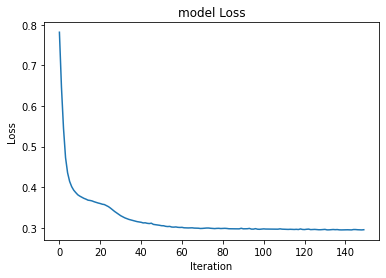

Training set score for accuracy: 0.847399
Test set score for accuracy: 0.843733
The f1 score of the MLP during testing is 0.8320699708454811


In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import *

#from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=101)

mlp = MLPClassifier(hidden_layer_sizes=(20, 3), max_iter=150, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-4, random_state=101)

mlp.fit(X_train, y_train)
#l_loss= mlp.accuracy_score(X_test, y_test)
#print(l_loss)


prd_r = mlp.predict(X_test)
print(prd_r.round())
test_acc = accuracy_score(y_test, prd_r.round(), normalize=False)
loss_values = mlp.loss_curve_
plt.plot(loss_values)
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()


tester= mlp.predict(X_test)
ans=f1_score(y_test, tester)
print("Training set score for accuracy: %f" % mlp.score(X_train, y_train))
print("Test set score for accuracy: %f" % mlp.score(X_test, y_test))

print("The f1 score of the MLP during testing is " + str(ans))


Train on 13266 samples, validate on 1475 samples
Epoch 1/10
13266/13266 [==============================] - 2s 171us/step - loss: 0.4612 - accuracy: 0.7595 - val_loss: 0.3656 - val_accuracy: 0.8278
Epoch 2/10
13266/13266 [==============================] - 2s 154us/step - loss: 0.3378 - accuracy: 0.8369 - val_loss: 0.3261 - val_accuracy: 0.8380
Epoch 3/10
13266/13266 [==============================] - 2s 155us/step - loss: 0.3178 - accuracy: 0.8398 - val_loss: 0.3242 - val_accuracy: 0.8386
Epoch 4/10
13266/13266 [==============================] - 2s 154us/step - loss: 0.3126 - accuracy: 0.8430 - val_loss: 0.3198 - val_accuracy: 0.8339
Epoch 5/10
13266/13266 [==============================] - 2s 154us/step - loss: 0.3101 - accuracy: 0.8437 - val_loss: 0.3207 - val_accuracy: 0.8366
Epoch 6/10
13266/13266 [==============================] - 2s 155us/step - loss: 0.3084 - accuracy: 0.8420 - val_loss: 0.3140 - val_accuracy: 0.8366
Epoch 7/10
13266/13266 [==============================] - 2s 15

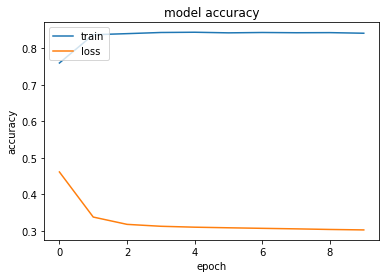

In [56]:
import numpy as np # linear algebra
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense


batch_size=100

model = Sequential()
model.add(Dense(14, input_dim=14, activation='sigmoid'))
model.add(Dense(15, activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',  metrics=['accuracy'])


#history = model.fit(X, y,  epochs=1, batch_size=10)

history = model.fit(X, y,validation_split = 0.1, epochs=10, batch_size=10)

print(model.metrics_names)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()





In [62]:
#tester= model.predict(X_test)
#print(tester.round())
#ans=f1_score(y_test, tester.round())
#print("The f1 score of the Keras Model during testing is " + str(ans))

f1_score = model.evaluate(X_test, y_test, verbose=0)

print("The F1 score of the Keras Model on the testing data is "+str(f1_score[1]))

The F1 score of the Keras Model on the testing data is 0.8478025197982788
